## A. Predictors of Antler Size in 4.5- and 5.5-year-old Male White-tailed Deer

## I. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score

## 2. Data

* These two datasets include data collected from 4.5- and 5.5-year-old male white-tailed deer from a captive colony at the Kerr Wildlife Management Area.  Two of the datasets includes parentage information, age, birth year, diet type, antler mass, and body mass of male white-tailed deer. 
* Variables: birth weight 'birth wt', mother 'DID', father 'SID', dietary intake 'Energy', birth year 'birthyr', and year data was collected 'yr'.
* The variable 'Energy' is an ordinal variable representing two diets that differed in dietary energy where 'S'= 2.65 kcal/g and 'L'= 1.77 kcal. 

## 3. Goals: 
* Assess the influence from environmental and  maternal factors on antler size of mature, 4.5- and 5.5-year-old, male white-tailed deer.

In [2]:
data_4 = pd.read_csv("Kerr_Data_4.5.csv")

data_5 = pd.read_csv("Kerr_Data_5.5.csv")

## 4. Data Cleaning

The variables 'Birthyrcat', 'Age', and 'ID' will be dropped from all datasets. 'Age' will be dropped because we already know that older deer have larger antlers. 'DaB' and 'Lit type' will be dropped in 2 of the 4 datasets analyzed since they have some NaN values.  These two datasets were split so that (1) two datasets would have more data to analyze, and (2) the effects of 'DaB' and 'Lit type' could be analyzed. Thus, four datasets were analyzed separately.

In [3]:
data_4.drop(['age','Birthyrcat','ID','DaB','Lit type'],axis=1, inplace=True)

In [4]:
data_5.drop(['age','Birthyrcat','ID','DaB','Lit type'],axis=1, inplace=True)

In [5]:
# 'Energy' was encoded with label encoder because it is an ordinal variable.  'Lit type' was one-hot encoded because it is a categorical variable.

le = LabelEncoder()

data_4['Energy'] = le.fit_transform(data_4['Energy'])

data_5['Energy'] = le.fit_transform(data_5['Energy'])

## 5. Segregating the target variable 'antler_kg'

In [6]:
X_4 = data_4.drop(['antler_kg'], axis=1)

y_4 = data_4['antler_kg']

In [7]:
X_5 = data_5.drop(['antler kg'], axis=1)

y_5 = data_5['antler kg']

## 5. Models: Random Forest and Gradient Boosting Regressor

### A. Regresssor models

In [8]:
rfc = RandomForestRegressor(random_state=0)
gb = GradientBoostingRegressor(random_state = 0)
xgbr = xg.XGBRegressor()


### C. Model selection: Cross-validation

* We will perform cross validation to evaluate the gradient boosting and random forest regressors on both the 4.5-year-olds and 5.5-year-olds datasets

In [9]:
scores_rfc_4 = cross_val_score(rfc,X_4,y_4,scoring="neg_mean_absolute_error",cv=10)
mae_rfc_4 = (-scores_rfc_4)
print("MAE values: ", mae_rfc_4)
print("MAE average: ", np.mean(mae_rfc_4))

MAE values:  [0.23103037 0.28046925 0.28890238 0.23850025 0.3719965  0.32674213
 0.28993463 0.29038275 0.28290443 0.26820429]
MAE average:  0.2869066964285715


In [10]:
scores_gb_4 = cross_val_score(gb,X_4,y_4,scoring="neg_mean_absolute_error",cv=10)
mae_gb_4 = (-scores_gb_4)
print("MAE values: ", mae_gb_4)
print("MAE average: ", np.mean(mae_gb_4))

MAE values:  [0.26041847 0.24252228 0.28083345 0.20027617 0.3591896  0.3200404
 0.33238415 0.27591741 0.29482839 0.28580702]
MAE average:  0.2852217347252235


In [11]:
scores_xgbr_4 = cross_val_score(xgbr,X_4,y_4,scoring="neg_mean_absolute_error",cv=10)
mae_xgbr_4 = (-scores_xgbr_4)
print("MAE values: ", mae_xgbr_4)
print("MAE average: ", np.mean(mae_xgbr_4))

MAE values:  [0.26669846 0.29349877 0.30620552 0.27461976 0.39913531 0.32784625
 0.31582496 0.31224192 0.31907353 0.30480838]
MAE average:  0.3119952857029438


In [12]:
scores_rfc_5 = cross_val_score(rfc,X_5,y_5,scoring="neg_mean_absolute_error",cv=10)
mae_rfc_5= (-scores_rfc_5)
print("MAE values: ", mae_rfc_5)
print("MAE average: ", np.mean(mae_rfc_5))

MAE values:  [0.187182   0.5297135  0.31699875 0.13839575 0.23558525 0.4187695
 0.22333375 0.2512635  0.31017125 0.2492725 ]
MAE average:  0.2860685749999998


In [13]:
scores_gb_5 = cross_val_score(gb,X_5,y_5,scoring="neg_mean_absolute_error",cv=10)
mae_gb_5 = (-scores_gb_5)
print("MAE values: ", mae_gb_5)
print("MAE average: ", np.mean(mae_gb_5))

MAE values:  [0.37240393 0.53404909 0.57142513 0.16883572 0.25691811 0.38987172
 0.21002084 0.20867209 0.35158956 0.26362335]
MAE average:  0.33274095201113785


In [14]:
scores_xgbr_5 = cross_val_score(xgbr,X_5,y_5,scoring="neg_mean_absolute_error",cv=10)
mae_xgbr_5 = (-scores_xgbr_5)
print("MAE values: ", mae_xgbr_5)
print("MAE average: ", np.mean(mae_xgbr_5))

MAE values:  [0.41960451 0.5944915  0.52649913 0.09096668 0.26699424 0.40955253
 0.2262795  0.23088407 0.47148614 0.36766112]
MAE average:  0.36044194295644766


Cross validation confirms that gradient boosting is appropriate for the 4.5-year olds (i.e., average MAE from the 10-folds of the gb regressor is less than that of the rf regressor).  However, average MAE from cross validation is lower for the rf regressor than the gb regressor, thus, rf regressor will used to fit our model.  The xgb regressor will not be used, as it had the lowest mean MAE for both datasets.

### D. Fit selected models on entire dataset

In [15]:
gb_4 = gb.fit(X_4, y_4)
rfc_5 = rfc.fit(X_5,y_5)

## 6. Important Features

### A. 4.5-year-olds

In [16]:
feat_importances_4 = pd.DataFrame(gb_4.feature_importances_, index=X_4.columns, columns=["Importance"])
feat_importances_4.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances_4

,Importance
bm kg,0.334083
birth wt,0.323640
DID,0.157973
SID,0.104817
Energy,0.072567
Birthyr,0.004163
yr,0.002757


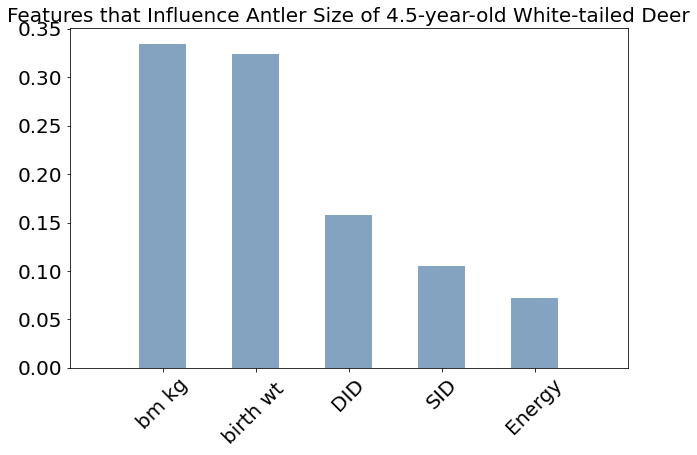

In [17]:
feature_names_4 = [col for col in X_4]
feature_importances_4 = gb_4.feature_importances_
indices_4 = np.argsort(feature_importances_4)[::-1]
n = 5 # maximum feature importances displayed
idx_4 = indices_4[0:n] 

plt.figure(figsize=(10, 6.25))
titlefont = 20
plt.title("Features that Influence Antler Size of 4.5-year-old White-tailed Deer", fontdict={'fontsize':titlefont})
plt.bar(range(n), feature_importances_4[idx_4], color=(0.2, 0.4, 0.6, 0.6), width=0.5, align="center")
xticksize = 20
plt.xticks(range(n), [feature_names_4[id] for id in idx_4], rotation = 45, fontdict={'fontsize':xticksize}) 
plt.tick_params(axis='y', which='major', labelsize=20)
plt.xlim([-1, n]) 
plt.show()

### B. 5.5-year-olds

In [18]:
feat_importances_5 = pd.DataFrame(rfc_5.feature_importances_, index=X_5.columns, columns=["Importance"])
feat_importances_5.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances_5

,Importance
bm kg,0.248734
DID,0.243775
SID,0.232968
birth wt,0.212945
Energy,0.029147
yr,0.016273
Birthyr,0.016158


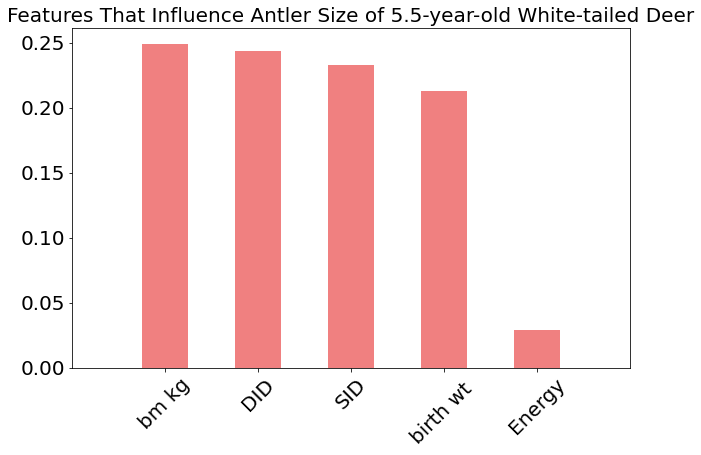

In [19]:
feature_names_5 = [col for col in X_5]
feature_importances_5 = rfc_5.feature_importances_
indices = np.argsort(feature_importances_5)[::-1]
n = 5 # maximum feature importances displayed
idx_5 = indices[0:n] 

plt.figure(figsize=(10, 6.25))
titlefont = 20
plt.title("Features That Influence Antler Size of 5.5-year-old White-tailed Deer", fontdict={'fontsize':titlefont})
plt.bar(range(n), feature_importances_5[idx_5], color="lightcoral", width=0.5, align="center")
xticksize = 20
plt.xticks(range(n), [feature_names_5[id] for id in idx_5], rotation = 45, fontdict={'fontsize':xticksize}) 
plt.tick_params(axis='y', which='major', labelsize=20)
plt.xlim([-1, n]) 
plt.show()

## 7. Implications

### A. 4.5-year-olds
* Antler size of 4.5-year-old males is most influenced by the body mass of the male, which is not surprising, but useful to know for certain. 
* 'Birth wt' is more predictive of antler size in 4.5-year-olds than in 5.5-year-olds.
* The mother ('DID') and father ('DID') were predictive of antler size.
* What's most surprising here is that, when it comes to determing antler size of mature males, it didn't really matter whether males had been eating a low or high energy diet ('Energy') throughout their life.  

###  B. 5.5-year-olds
* Body mass is also the most influential feature of antler size in 5.5-year-old males.
* The mother ('DID') and father ('DID') were predictive of antler size.
* Like in 4.5-year-olds, available dietary energy (high versus low; 'Energy') was not very influential.